In [3]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt  
import statsmodels.api as sm    
import pandas as pd
import pandas.io.data
import datetime
import seaborn as sb  
sb.set_style('darkgrid')

In [4]:
start=datetime.datetime(1993,1,1)
end=datetime.datetime(2015,10,31)

In [5]:
sp=pandas.io.data.get_data_yahoo('^GSPC',start,end)

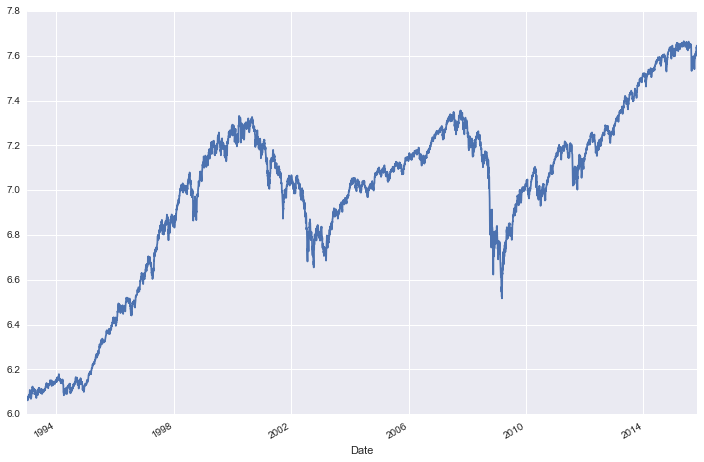

In [6]:
sp['Natural Log'] = sp['Adj Close'].apply(lambda x: np.log(x))  
sp['Natural Log'].plot(figsize=(12, 8))  

In [7]:
sp['Logged First Difference'] = sp['Natural Log'] - sp['Natural Log'].shift()    

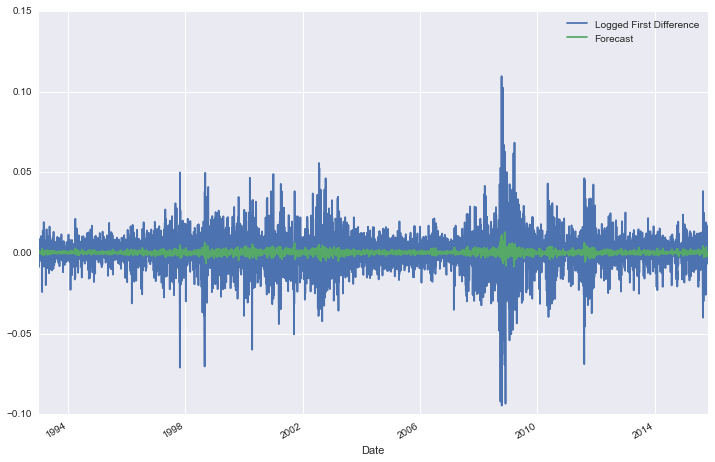

In [11]:
model = sm.tsa.ARIMA(sp['Logged First Difference'].iloc[1:], order=(10, 0, 0))  
results = model.fit(disp=-1)  
sp['Forecast'] = results.fittedvalues  
sp[['Logged First Difference', 'Forecast']].plot(figsize=(12, 8)) 